In [1]:
import numpy as np
import pandas as pd
import math
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.colors as colors

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('tabledata.txt', header = None, delimiter = ',')
fs = 838000


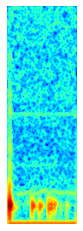

In [4]:
sample = data.iloc[:,1] #change the second entry to change what sample you are making spectograms of 
x = sample

f, t, Zxx = signal.stft(x, fs, window='hann', nperseg = 256, noverlap=220, nfft= 512, return_onesided=True)
#plt.pcolormesh(t, f, np.abs(Zxx))
sdb = np.abs(Zxx);
plt.pcolormesh(t, f, sdb)
cc = max(sdb.flatten())+[-60, 0]
ax = plt.gca()
ax.CLim = cc
c = "jet"
ax.imshow(np.flip(np.fliplr(sdb)), cmap=c, norm=colors.LogNorm(vmin=sdb.min(), vmax=sdb.max()))
plt.axis('off')
plt.savefig('test.png')
